# 데이터 마이닝 중간 과제

데이터 출처 : https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data

In [96]:
# 데이터 분석에 필요한 패키지 import
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [97]:
warnings.filterwarnings('ignore')

# 데이터 불러오기
data = pd.read_csv("C:/Users/daily/Downloads/bank_transactions_data_2.csv")

# 데이터 변수 정보 확인
print('----------- data info -----------')
print(data.info())
print('')

# CustomerAge 변수를 구간화
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 100]
labels = ['Under 10', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', 'Over 90']
data['AgeGroup'] = pd.cut(data['CustomerAge'], bins=bins, labels=labels, right=True)

# CustomerAge를 AgeGroup으로 대체
data.drop('CustomerAge', axis = 1, inplace= True)
data['AgeGroup'].astype('category')

# 기초 통계량 출력
print('----------- data describe -----------')
desc = data.describe()
print(desc)

----------- data info -----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int

# 수치형 변수 분석

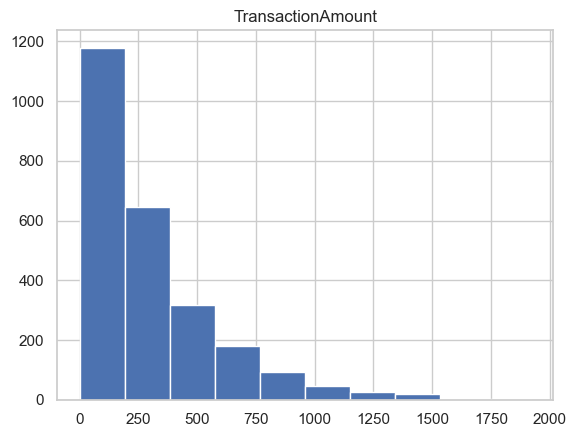

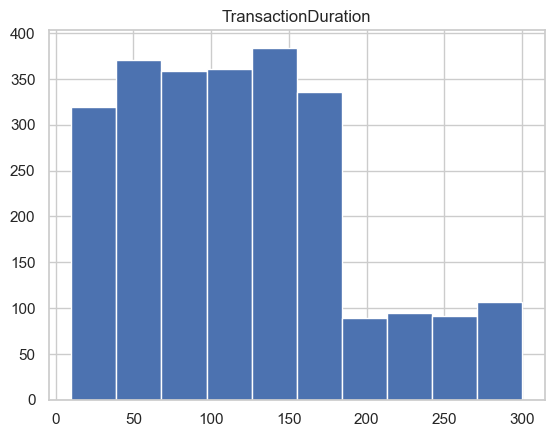

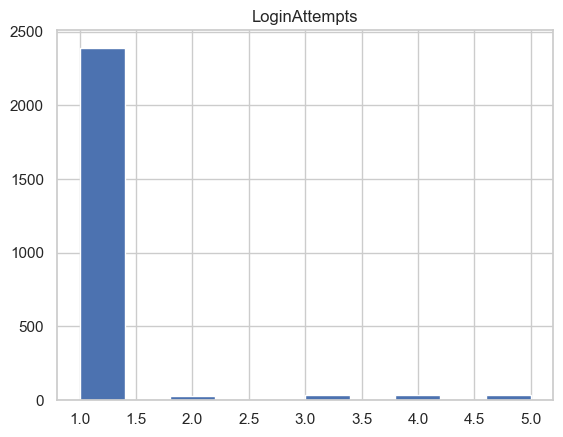

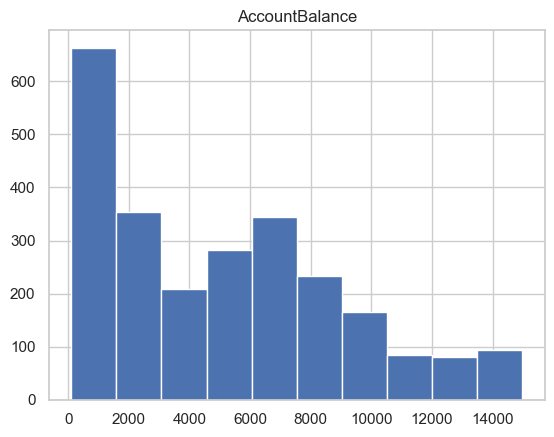

In [98]:
# 수치형 데이터의 분포를 히스토그램으로 확인

continual = ['TransactionAmount', 'TransactionDuration', 
             'LoginAttempts', 'AccountBalance']

for i in continual:
    plt.title(i)
    plt.hist(data[i])
    plt.show()

# 스케일링 전 공분산 확인

----- correlation matrix -----
                     TransactionAmount  TransactionDuration  LoginAttempts  \
TransactionAmount             1.000000             0.004359      -0.008445   
TransactionDuration           0.004359             1.000000       0.032639   
LoginAttempts                -0.008445             0.032639       1.000000   
AccountBalance               -0.025165             0.005577       0.014999   

                     AccountBalance  
TransactionAmount         -0.025165  
TransactionDuration        0.005577  
LoginAttempts              0.014999  
AccountBalance             1.000000  

----- covariance matrix -----
                     TransactionAmount  TransactionDuration  LoginAttempts  \
TransactionAmount         85232.609025            89.041404      -1.485935   
TransactionDuration          89.041404          4894.927283       1.376202   
LoginAttempts                -1.485935             1.376202       0.363202   
AccountBalance           -28659.468379       

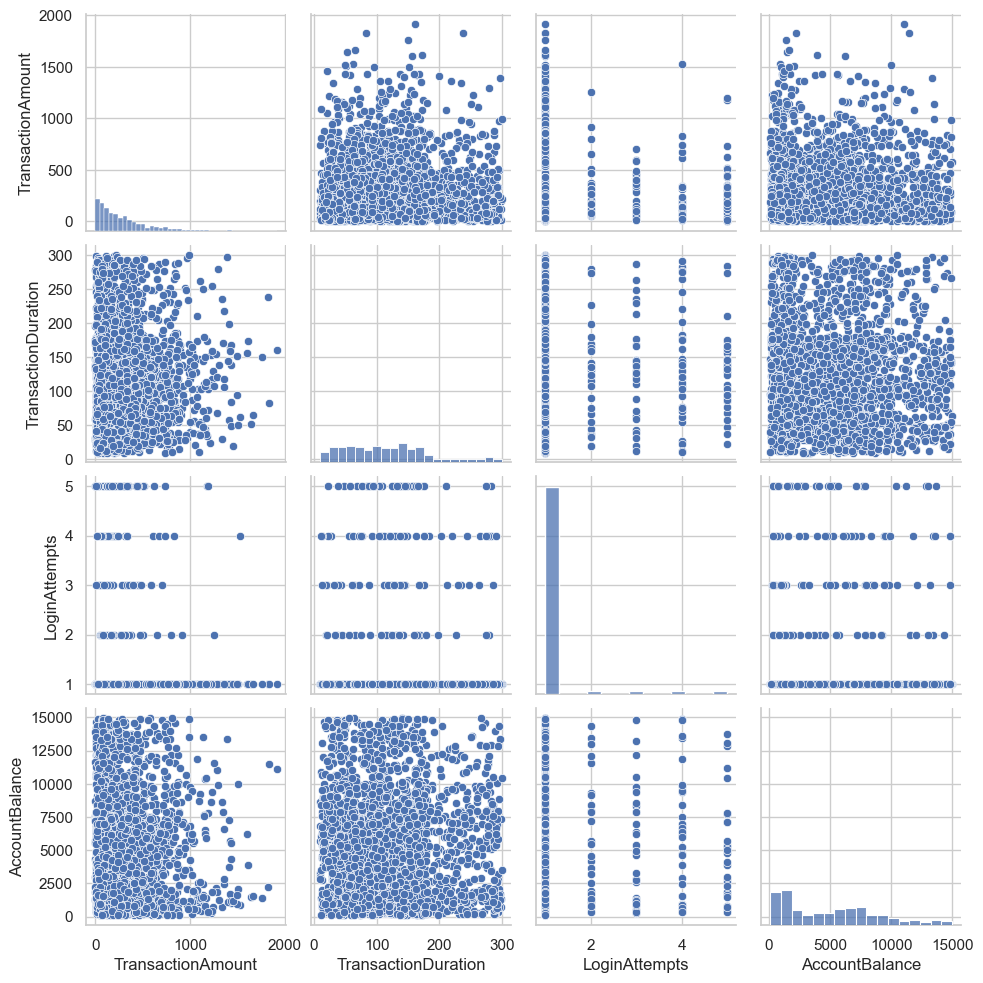

In [99]:
numeric_col = data[['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']]

# 공분산 행렬 계산
corr_matrix = numeric_col.corr()
cov_matrix = numeric_col.cov()

# 결과 출력
print('----- correlation matrix -----')
print(corr_matrix)
print('\n----- covariance matrix -----')
print(cov_matrix)

# 변수들의 산점도 확인
sns.pairplot(numeric_col)
plt.show()

# 범주형 변수 분석

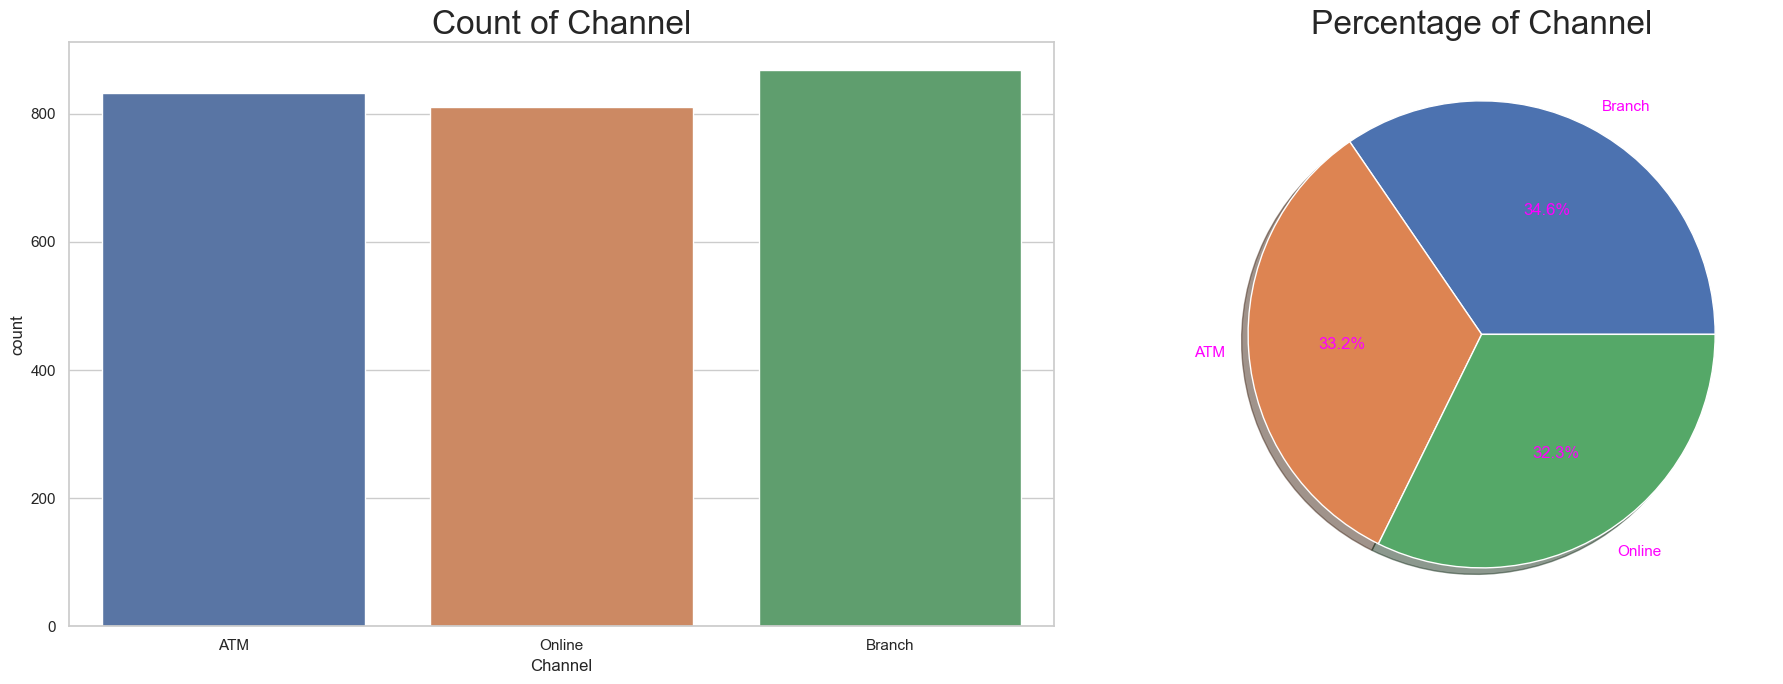

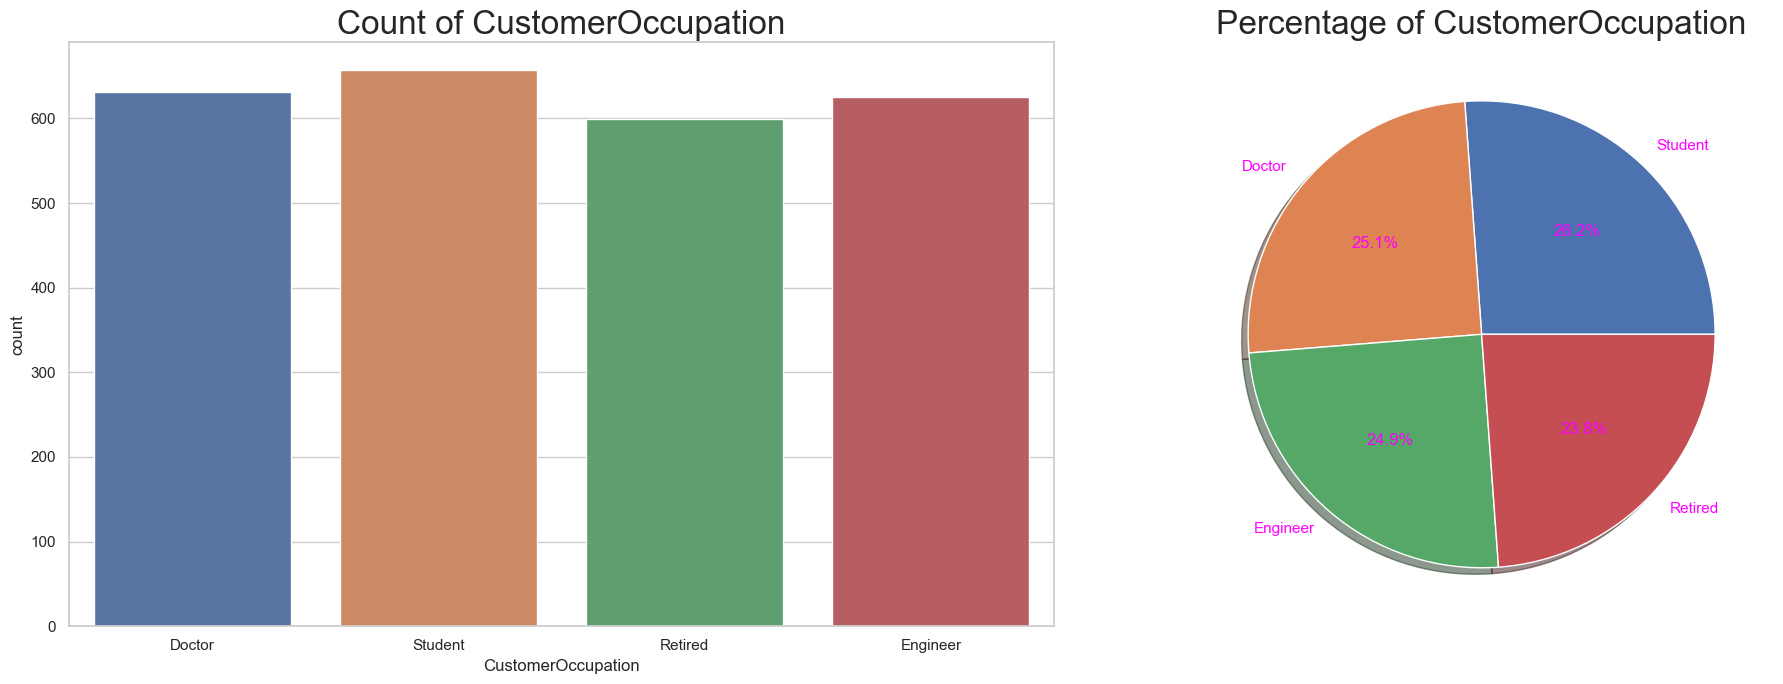

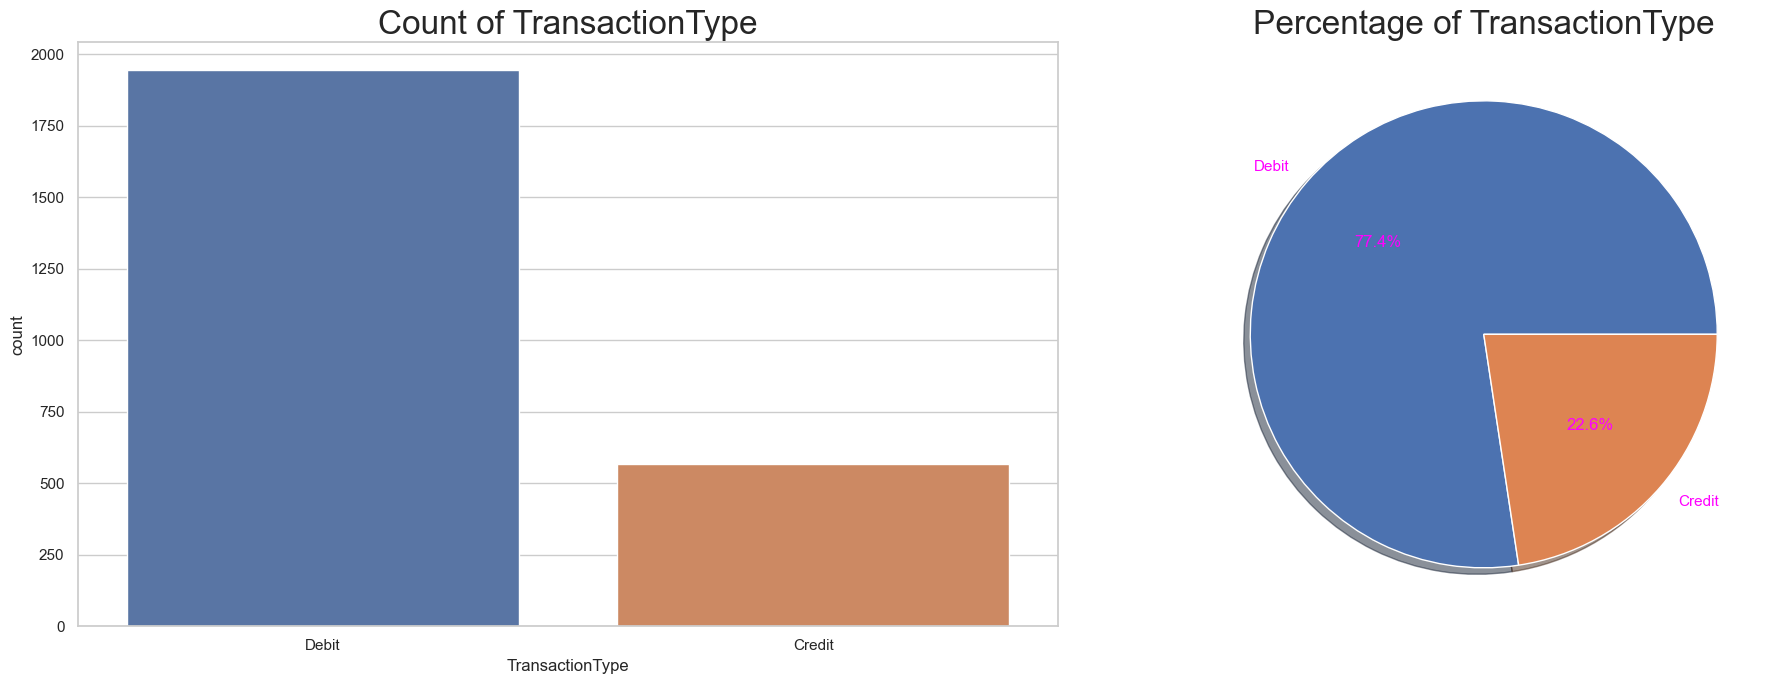

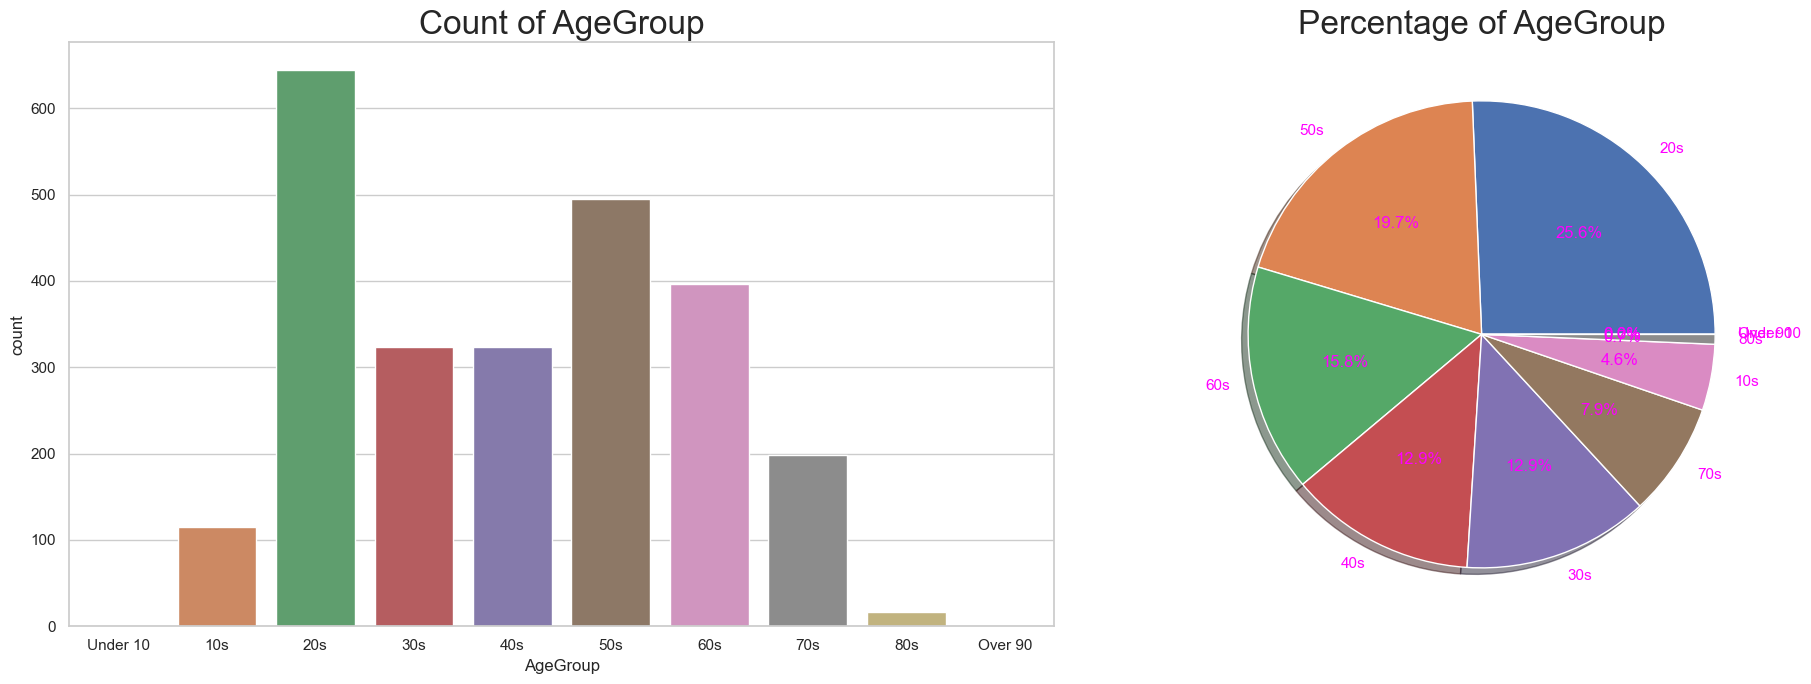

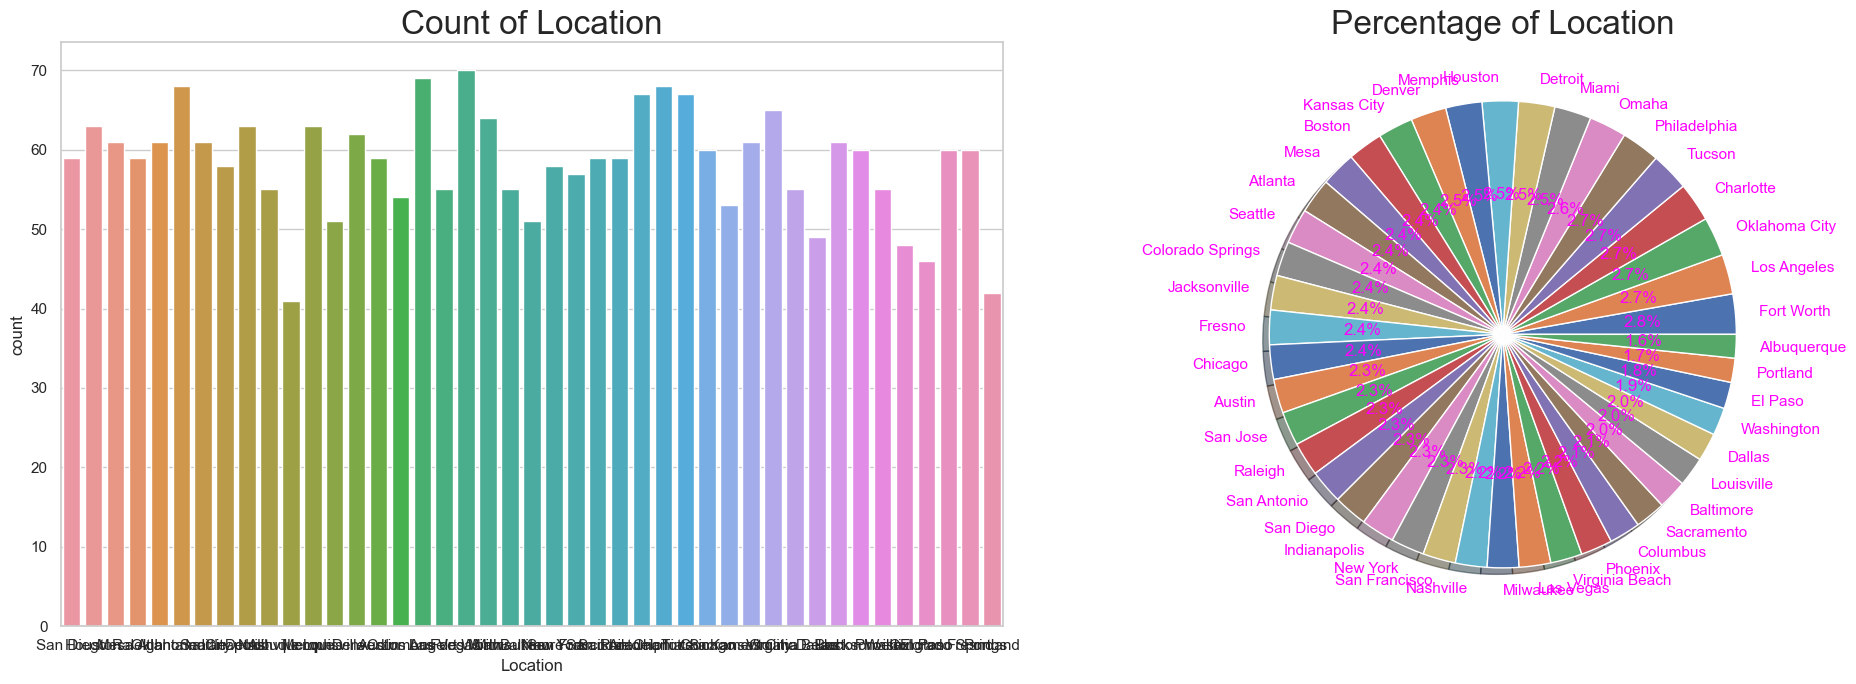

In [100]:
# 범주별 barplot과 pie chart 생성하기

categorical = ['Channel','CustomerOccupation', 'TransactionType', 'AgeGroup', 'Location']

for i in categorical:
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.countplot(data=data, x=i, ax=ax[0])  
    channelpct = data[i].value_counts(normalize=True) * 100  
    ax[1].pie(channelpct, autopct='%0.1f%%', labels=channelpct.index, textprops=dict(color='magenta'), shadow=True)
    ax[0].set_title(f'Count of {i}', fontsize=24)
    ax[1].set_title(f'Percentage of {i}', fontsize=24)
    plt.tight_layout()
    plt.show()

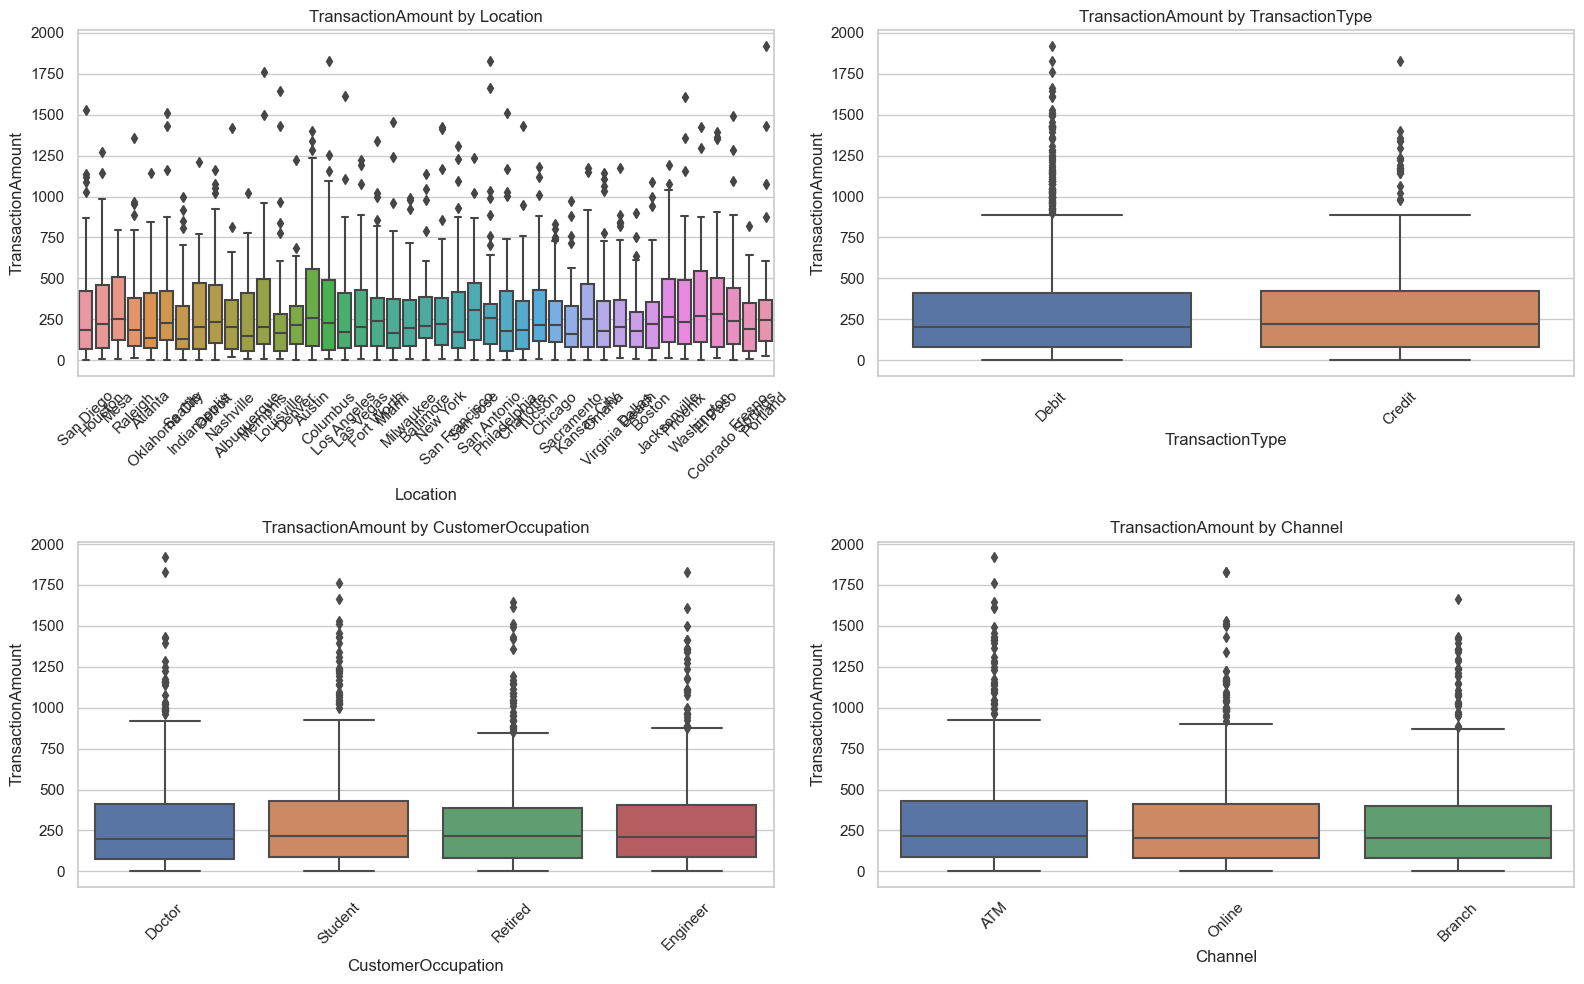

In [101]:
# boxplot

# 그룹화할 변수 목록
group_vars = ['Location', 'TransactionType', 'CustomerOccupation', 'Channel']

# subplot 크기 설정
fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # 2x2 그리드

# 그래프 스타일 설정
sns.set(style="whitegrid")

# 각 그룹 변수에 대해 상자그림 그리기
for ax, var in zip(axes.flat, group_vars):
    sns.boxplot(x=var, y='TransactionAmount', data=data, ax=ax)
    ax.set_title(f'TransactionAmount by {var}')
    ax.tick_params(axis='x', rotation=45)  # x축 라벨 회전

plt.tight_layout()
plt.show()


# 범주형 변수를 수치형으로 변환

0       6
1       5
2       0
3       1
4       1
       ..
2507    2
2508    3
2509    4
2510    1
2511    1
Name: AgeGroup, Length: 2512, dtype: int32


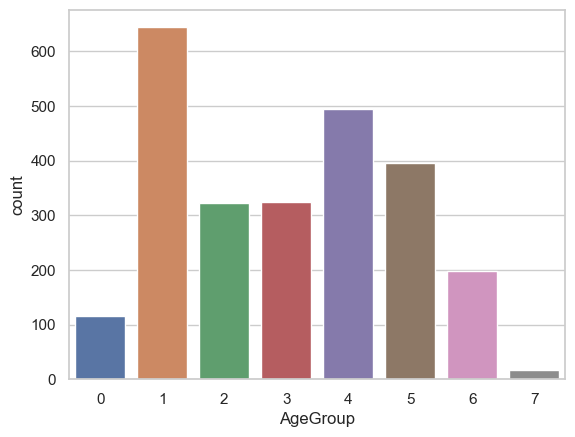

In [102]:
# agegroup을 수치형 변수로 변경
# 연령대는 순서의 개념이 있기 때문에 10대 -> 1, 20대 -> 2 와 같은 방법으로 수치화화
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
data['AgeGroup'] = le.fit_transform(data['AgeGroup'])
print(data['AgeGroup'])

sns.countplot(data=data, x='AgeGroup')
plt.show()

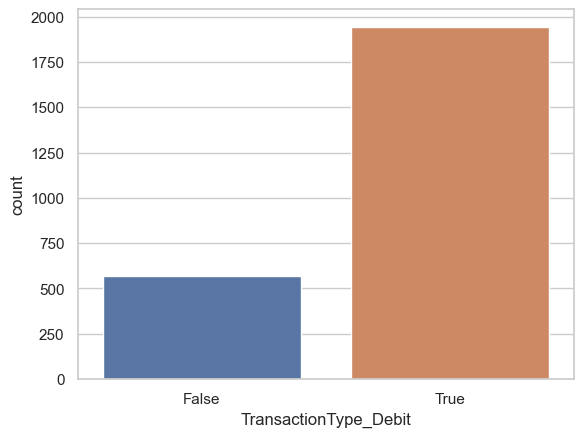

In [103]:
# Transaction Type의 원핫 인코딩
# 첫번째 열을 제거하여 다중공선성 문제 해결
data = pd.get_dummies(data, columns=['TransactionType'], drop_first=True)
data.head()

sns.countplot(data=data, x='TransactionType_Debit')
plt.show()

In [104]:
# 변환된 컬럼 확인
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,TransactionType_Debit
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,San Diego,D000380,162.198.218.92,M015,ATM,Doctor,81,1,5112.21,2024-11-04 08:08:08,6,True
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Houston,D000051,13.149.61.4,M052,ATM,Doctor,141,1,13758.91,2024-11-04 08:09:35,5,True
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Mesa,D000235,215.97.143.157,M009,Online,Student,56,1,1122.35,2024-11-04 08:07:04,0,True
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Raleigh,D000187,200.13.225.150,M002,Online,Student,25,1,8569.06,2024-11-04 08:09:06,1,True
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Atlanta,D000308,65.164.3.100,M091,Online,Student,198,1,7429.40,2024-11-04 08:06:39,1,False


# 일별, 월별 거래량 시각화

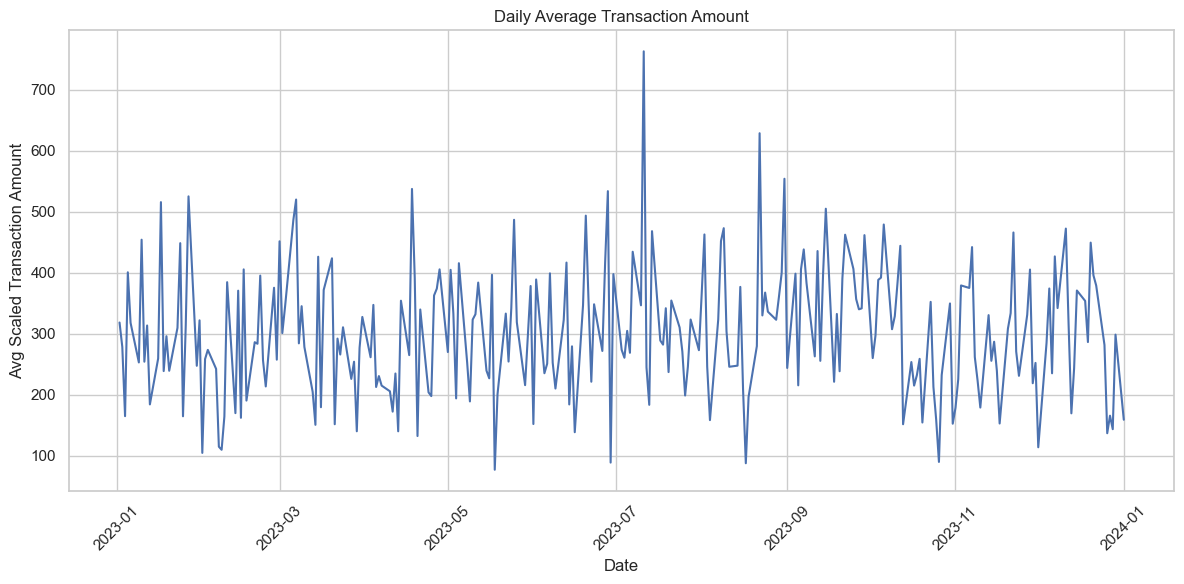

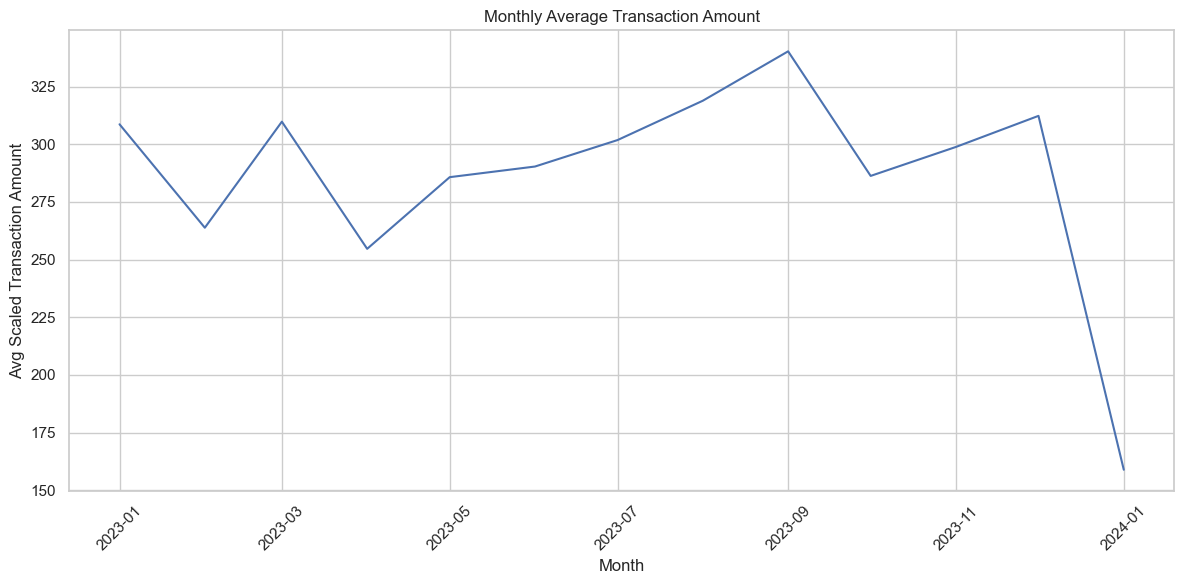

In [105]:
# 날짜를 datetime 형식으로 변환
data['TransactionDate'] = pd.to_datetime(data['TransactionDate']).dt.date

group = data.groupby('TransactionDate')['TransactionAmount'].mean()  # 날짜별 평균 집계

plt.figure(figsize=(12, 6))
plt.plot(group.index, group.values)  # x: 날짜, y: 평균 거래금액
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Avg Scaled Transaction Amount')
plt.title('Daily Average Transaction Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# 날짜를 datetime 형식으로 변환
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

# 월별로 변환 (Period 형식 → Timestamp로 변환)
data['Month'] = data['TransactionDate'].dt.to_period('M').dt.to_timestamp()

# 월별 평균 거래 금액
monthly_avg = data.groupby('Month')['TransactionAmount'].mean()

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg.values)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Avg Scaled Transaction Amount')
plt.title('Monthly Average Transaction Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# Isolation Tree 모델을 이용한 이상치 탐지
1. 무작위로 하나의 특성(feature)을 선택

2. 해당 특성에서 무작위로 분할 기준값을 선택하여 데이터를 두 그룹으로 분할

3. 이 과정을 반복하여 트리 형성

4. 어떤 데이터 포인트가 트리에서 더 빨리(= 더 짧은 경로로) 분리되면, 이는 이상치일 가능성이 높다고 판단

In [106]:
new_data = data.copy()

new_data["TransactionDate"] = pd.to_datetime(new_data["TransactionDate"])
if "PreviousTransactionDate" in new_data.columns:
    new_data["PreviousTransactionDate"] = pd.to_datetime(new_data["PreviousTransactionDate"])

In [107]:
new_data["Hour"] = new_data["TransactionDate"].dt.hour
new_data["DayOfWeek"] = new_data["TransactionDate"].dt.dayofweek
new_data["Weekend"] = new_data["DayOfWeek"].apply(lambda x: 1 if x >= 5 else 0)
new_data["Month"] = new_data["TransactionDate"].dt.month

In [108]:
if "PreviousTransactionDate" in new_data.columns:
    new_data["TimeSinceLastTx"] = (new_data["TransactionDate"] - new_data["PreviousTransactionDate"]).dt.total_seconds() / 3600
    new_data["TimeSinceLastTx"].fillna(new_data["TimeSinceLastTx"].median(), inplace=True)

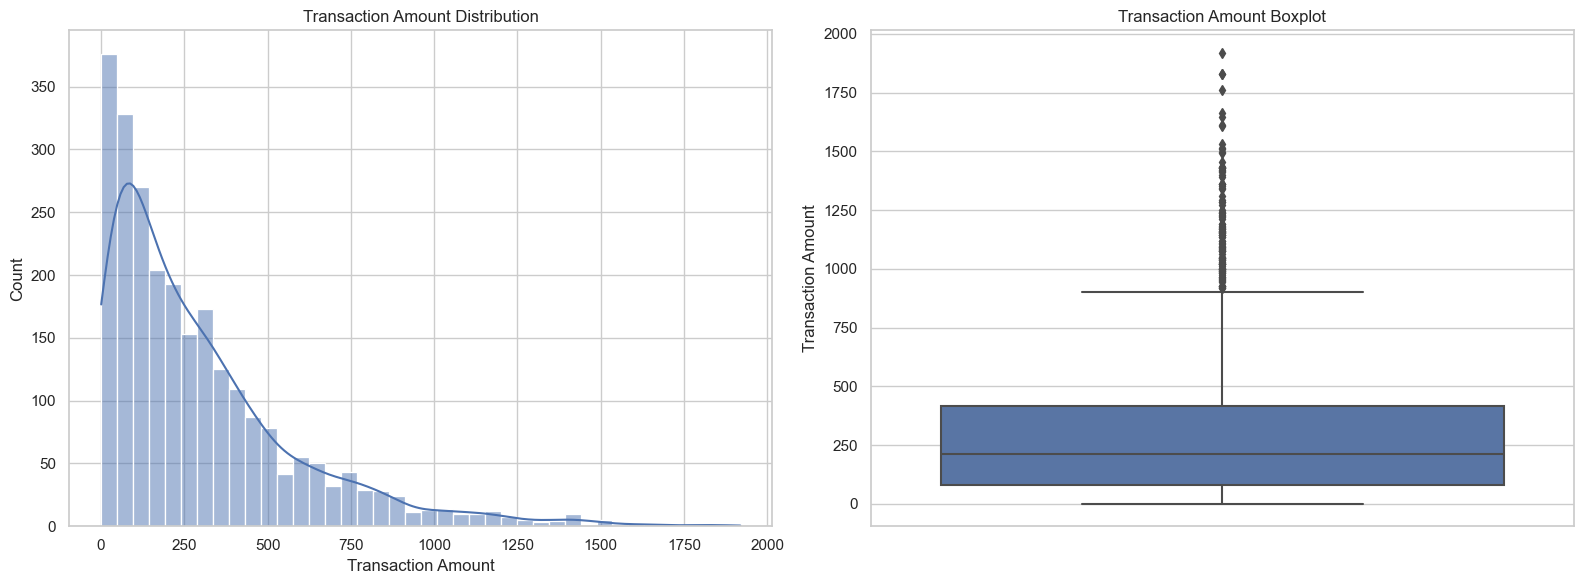

In [109]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(new_data['TransactionAmount'], kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')

plt.subplot(1, 2, 2)
sns.boxplot(y=new_data['TransactionAmount'])
plt.title('Transaction Amount Boxplot')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.show()

In [110]:
device_tx_count = new_data.groupby('DeviceID').size().reset_index(name='DeviceTxCount')
new_data = new_data.merge(device_tx_count, on='DeviceID', how='left')
new_data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,...,AccountBalance,PreviousTransactionDate,AgeGroup,TransactionType_Debit,Month,Hour,DayOfWeek,Weekend,TimeSinceLastTx,DeviceTxCount
0,TX000001,AC00128,14.09,2023-04-11,San Diego,D000380,162.198.218.92,M015,ATM,Doctor,...,5112.21,2024-11-04 08:08:08,6,True,4,0,1,0,-13760.135556,6
1,TX000002,AC00455,376.24,2023-06-27,Houston,D000051,13.149.61.4,M052,ATM,Doctor,...,13758.91,2024-11-04 08:09:35,5,True,6,0,1,0,-11912.159722,5
2,TX000003,AC00019,126.29,2023-07-10,Mesa,D000235,215.97.143.157,M009,Online,Student,...,1122.35,2024-11-04 08:07:04,0,True,7,0,0,0,-11600.117778,5
3,TX000004,AC00070,184.50,2023-05-05,Raleigh,D000187,200.13.225.150,M002,Online,Student,...,8569.06,2024-11-04 08:09:06,1,True,5,0,4,0,-13184.151667,6
4,TX000005,AC00411,13.45,2023-10-16,Atlanta,D000308,65.164.3.100,M091,Online,Student,...,7429.40,2024-11-04 08:06:39,1,False,10,0,0,0,-9248.110833,3


In [111]:
from scipy import stats

z_scores = stats.zscore(new_data['TransactionAmount'])
new_data['Amount_Z_Score'] = z_scores
print(f"\nOutliers (|z-score| > 3): {len(new_data[abs(new_data['Amount_Z_Score']) > 3])}")


Outliers (|z-score| > 3): 48


In [112]:
model_data = new_data.copy()

# 모델에 투입하기 위해 분석에 필요하지 않은 컬럼 삭제
if "TransactionID" in model_data.columns:
    model_data.drop("TransactionID", axis=1, inplace=True)
if "AccountID" in model_data.columns:
    model_data.drop("AccountID", axis=1, inplace=True)
if "IP Address" in model_data.columns:
    model_data.drop("IP Address", axis=1, inplace=True)
if "TransactionDate" in model_data.columns:
    model_data.drop("TransactionDate", axis=1, inplace=True)
if "PreviousTransactionDate" in model_data.columns:
    model_data.drop("PreviousTransactionDate", axis=1, inplace=True)
if "Amount_Z_Score" in model_data.columns:
    model_data.drop("Amount_Z_Score", axis = 1, inplace = True)

model_data.head()

,TransactionAmount,Location,DeviceID,MerchantID,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,TransactionType_Debit,Month,Hour,DayOfWeek,Weekend,TimeSinceLastTx,DeviceTxCount
0,14.09,San Diego,D000380,M015,ATM,Doctor,81,1,5112.21,6,True,4,0,1,0,-13760.135556,6
1,376.24,Houston,D000051,M052,ATM,Doctor,141,1,13758.91,5,True,6,0,1,0,-11912.159722,5
2,126.29,Mesa,D000235,M009,Online,Student,56,1,1122.35,0,True,7,0,0,0,-11600.117778,5
3,184.50,Raleigh,D000187,M002,Online,Student,25,1,8569.06,1,True,5,0,4,0,-13184.151667,6
4,13.45,Atlanta,D000308,M091,Online,Student,198,1,7429.40,1,False,10,0,0,0,-9248.110833,3


In [113]:
categorical_cols = ['DeviceID', 'MerchantID', 'Channel', 
                    'CustomerOccupation', 'Location']

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=categorical_cols)

model_data = encoder.fit_transform(model_data)

model_data.head()

,TransactionAmount,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,DeviceID_0,DeviceID_1,DeviceID_2,...,LoginAttempts,AccountBalance,AgeGroup,TransactionType_Debit,Month,Hour,DayOfWeek,Weekend,TimeSinceLastTx,DeviceTxCount
0,14.09,0,0,0,0,0,1,0,0,0,...,1,5112.21,6,True,4,0,1,0,-13760.135556,6
1,376.24,0,0,0,0,1,0,0,0,0,...,1,13758.91,5,True,6,0,1,0,-11912.159722,5
2,126.29,0,0,0,0,1,1,0,0,0,...,1,1122.35,0,True,7,0,0,0,-11600.117778,5
3,184.50,0,0,0,1,0,0,0,0,0,...,1,8569.06,1,True,5,0,4,0,-13184.151667,6
4,13.45,0,0,0,1,0,1,0,0,0,...,1,7429.40,1,False,10,0,0,0,-9248.110833,3


In [114]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# BinaryEncoder로 변환된 열들 중, categorical_cols에서 파생된 열만 선택
encoded_col_prefixes = categorical_cols
encoded_cols = [col for col in model_data.columns 
                if any(col.startswith(prefix + '_') for prefix in encoded_col_prefixes)]

# VIF 계산용 데이터프레임
X = model_data[encoded_cols]

# VIF 계산
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 정렬된 출력
print(vif_data)

                 feature       VIF
0             Location_0  1.793301
1             Location_1  2.035733
2             Location_2  1.878348
3             Location_3  1.943978
4             Location_4  1.957871
5             Location_5  1.997008
6             DeviceID_0  1.473210
7             DeviceID_1  1.886662
8             DeviceID_2  1.833283
9             DeviceID_3  1.920235
10            DeviceID_4  1.931914
11            DeviceID_5  2.015253
12            DeviceID_6  1.957519
13            DeviceID_7  1.990327
14            DeviceID_8  2.039191
15            DeviceID_9  1.976359
16          MerchantID_0  1.770306
17          MerchantID_1  1.789159
18          MerchantID_2  1.882450
19          MerchantID_3  1.842758
20          MerchantID_4  1.952275
21          MerchantID_5  1.995608
22          MerchantID_6  1.905374
23             Channel_0  3.446393
24             Channel_1  3.496221
25  CustomerOccupation_0  3.236009
26  CustomerOccupation_1  3.476551
27  CustomerOccupati

In [115]:
model_data.to_excel("encoded_model_data.xlsx", index=False)

In [116]:
from sklearn.preprocessing import StandardScaler

numerics = ['TransactionAmount', 'TransactionDuration', 'DeviceTxCount',
            'LoginAttempts', 'AccountBalance', 'AgeGroup', 'Hour', 'DayOfWeek',
            'Weekend', 'Month', 'TimeSinceLastTx']

scaler = StandardScaler()
scaled = scaler.fit_transform(model_data[numerics])

# 1. 기존 데이터 복사
df_scaled = model_data.copy()

# 2. 스케일링된 값을 해당 열에 덮어쓰기
df_scaled[numerics] = scaled

In [117]:
df_scaled.to_excel("scale.xlsx", index = False)


Applying t-SNE for visualization...


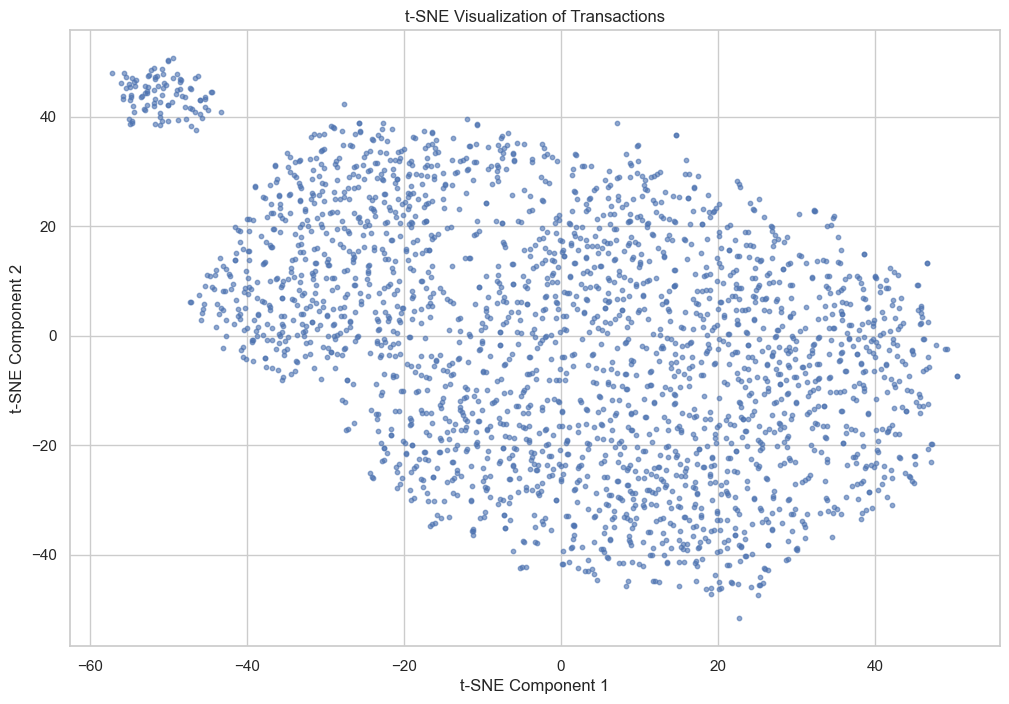

In [118]:
from sklearn.manifold import TSNE

tsne = TSNE()
tsne_results = tsne.fit_transform(df_scaled)

print("\nApplying t-SNE for visualization...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(df_scaled)

plt.figure(figsize=(12, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=10, alpha=0.6)
plt.title('t-SNE Visualization of Transactions')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [119]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import pairwise_distances
import numpy as np

best_score = -np.inf
best_params = {}

for n in [100, 200, 300, 400]:
    for c in [0.01, 0.02, 0.05]:
        for s in [100, 'auto']:
            model = IsolationForest(n_estimators=n, contamination=c, max_samples=s, random_state=42)
            labels = model.fit_predict(df_scaled)

            # 이상치만 추출
            outliers = df_scaled[labels == -1]
            normal = df_scaled[labels == 1]

            if len(outliers) > 1 and len(normal) > 1:
                # 평균 거리 차이 계산 (예시 기준)
                outlier_dist = np.mean(pairwise_distances(outliers))
                normal_dist = np.mean(pairwise_distances(normal))
                distance_diff = outlier_dist - normal_dist

                if distance_diff > best_score:
                    best_score = distance_diff
                    best_params = {
                        'n_estimators': n,
                        'contamination': c,
                        'max_samples': s
                    }

best_iso_forest = model
print("Best params:", best_params)
print("Score (distance diff):", best_score)

Best params: {'n_estimators': 300, 'contamination': 0.01, 'max_samples': 'auto'}
Score (distance diff): 1.5871520192968998


In [120]:
model_data['IF_Anomaly'] = best_iso_forest.predict(df_scaled)
model_data['IF_Score'] = best_iso_forest.decision_function(df_scaled)

In [121]:
model_data['IF_Anomaly'] = model_data['IF_Anomaly'].map({1: 0, -1: 1})

In [122]:
model_data.head()

,TransactionAmount,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,DeviceID_0,DeviceID_1,DeviceID_2,...,AgeGroup,TransactionType_Debit,Month,Hour,DayOfWeek,Weekend,TimeSinceLastTx,DeviceTxCount,IF_Anomaly,IF_Score
0,14.09,0,0,0,0,0,1,0,0,0,...,6,True,4,0,1,0,-13760.135556,6,0,0.050370
1,376.24,0,0,0,0,1,0,0,0,0,...,5,True,6,0,1,0,-11912.159722,5,0,0.047943
2,126.29,0,0,0,0,1,1,0,0,0,...,0,True,7,0,0,0,-11600.117778,5,0,0.058394
3,184.50,0,0,0,1,0,0,0,0,0,...,1,True,5,0,4,0,-13184.151667,6,0,0.040947
4,13.45,0,0,0,1,0,1,0,0,0,...,1,False,10,0,0,0,-9248.110833,3,0,0.029668


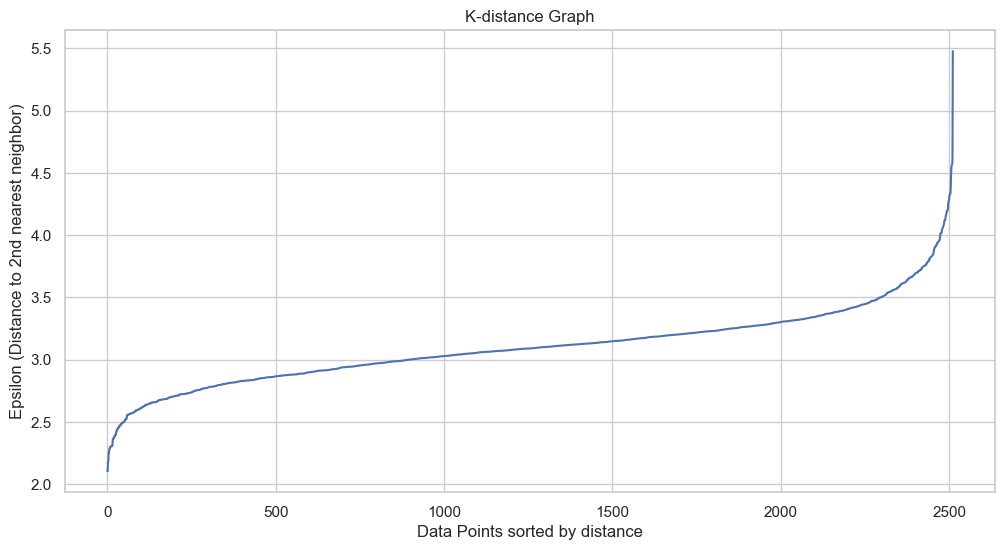

In [123]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=2)
nn.fit(df_scaled)
distances, indices = nn.kneighbors(df_scaled)
distances = np.sort(distances[:, 1])

plt.figure(figsize=(12, 6))
plt.plot(range(len(distances)), distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon (Distance to 2nd nearest neighbor)')
plt.grid(True)
plt.show()

In [145]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = [3.5, 4.0, 4.5]
min_samples_values = [5, 10, 15, 20]

best_silhouette = -1
best_min_samples = None

print("\nFinding optimal DBSCAN parameters...")

for eps_value in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
        labels = dbscan.fit_predict(df_scaled)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1 and not all(l == -1 for l in labels):
            try:
                score = silhouette_score(df_scaled, labels)
                print(f"eps={eps_value}, min_samples={min_samples}, n_clusters={n_clusters}, silhouette={score:.4f}")
                if score > best_silhouette:
                    best_silhouette = score
                    best_min_samples = min_samples
            except:
                continue

print(f"\nBest DBSCAN parameters: eps={eps_value}, min_samples={best_min_samples}, silhouette={best_silhouette:.4f}")


Finding optimal DBSCAN parameters...
eps=4.0, min_samples=5, n_clusters=4, silhouette=0.1779

Best DBSCAN parameters: eps=4.5, min_samples=5, silhouette=0.1779


In [125]:
dbscan = DBSCAN(eps=eps_value if eps_value else 2.5, min_samples=best_min_samples if best_min_samples else 10)
model_data['DBSCAN_Label'] = dbscan.fit_predict(df_scaled)

In [126]:
model_data['DBSCAN_Anomaly'] = model_data['DBSCAN_Label'].apply(lambda x: 1 if x == -1 else 0)

In [127]:
import numpy as np
from sklearn.metrics import pairwise_distances

# DBSCAN 이상치 여부 컬럼 생성
model_data['DBSCAN_Anomaly'] = model_data['DBSCAN_Label'].apply(lambda x: 1 if x == -1 else 0)

# 특징 데이터만 추출 (레이블 열 제외)
feature_cols = model_data.columns.difference(['DBSCAN_Label', 'DBSCAN_Anomaly'])

# 정상 / 이상치 데이터 분리
dbscan_normal = model_data[model_data['DBSCAN_Anomaly'] == 0][feature_cols]
dbscan_outlier = model_data[model_data['DBSCAN_Anomaly'] == 1][feature_cols]

# 평균 거리 함수
def mean_pairwise_distance(X):
    if len(X) < 2:
        return np.nan
    dists = pairwise_distances(X)
    return np.mean(dists[np.triu_indices_from(dists, k=1)])  # 상삼각만 사용

# 평균 거리 계산
dbscan_mean_normal_dist = mean_pairwise_distance(dbscan_normal)
dbscan_mean_outlier_dist = mean_pairwise_distance(dbscan_outlier)

# 출력
print(f"DBSCAN 정상 평균 거리: {dbscan_mean_normal_dist:.4f}")
print(f"DBSCAN 이상치 평균 거리: {dbscan_mean_outlier_dist:.4f}")


DBSCAN 정상 평균 거리: 5843.1124
DBSCAN 이상치 평균 거리: 7713.0564


In [142]:
from sklearn.metrics import silhouette_score

# 특징 데이터
X = model_data[feature_cols].values

# 라벨: 정상 vs 이상치 (0, 1)
labels = model_data['DBSCAN_Anomaly'].values

# 실루엣 스코어 계산
if len(set(labels)) > 1:
    sil_score = silhouette_score(X, labels)
    print(f"[이상치 vs 정상] 이진 실루엣 스코어: {sil_score:.4f}")
else:
    print("라벨이 하나뿐이어서 실루엣 스코어를 계산할 수 없습니다.")

[이상치 vs 정상] 이진 실루엣 스코어: 0.1534


In [128]:
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(nu=0.05, kernel="rbf", gamma='auto')
model_data['OCSVM_Anomaly'] = ocsvm.fit_predict(df_scaled)
model_data['OCSVM_Score'] = ocsvm.decision_function(df_scaled)

In [129]:
model_data['OCSVM_Anomaly'] = model_data['OCSVM_Anomaly'].map({1: 0, -1: 1})

In [130]:
print("\nAnomaly counts by each method:")
print(f"Isolation Forest Anomalies: {model_data['IF_Anomaly'].sum()} ({model_data['IF_Anomaly'].mean()*100:.2f}%)")
print(f"DBSCAN Anomalies: {model_data['DBSCAN_Anomaly'].sum()} ({model_data['DBSCAN_Anomaly'].mean()*100:.2f}%)")
print(f"One-Class SVM Anomalies: {model_data['OCSVM_Anomaly'].sum()} ({model_data['OCSVM_Anomaly'].mean()*100:.2f}%)")


Anomaly counts by each method:
Isolation Forest Anomalies: 126 (5.02%)
DBSCAN Anomalies: 7 (0.28%)
One-Class SVM Anomalies: 126 (5.02%)


In [144]:
from sklearn.metrics import silhouette_score

# 특징 데이터
X = model_data[feature_cols].values

# 라벨: 정상 vs 이상치 (0, 1)
labels = model_data['OCSVM_Anomaly'].values

# 실루엣 스코어 계산
if len(set(labels)) > 1:
    sil_score = silhouette_score(X, labels)
    print(f"[이상치 vs 정상] 이진 실루엣 스코어: {sil_score:.4f}")
else:
    print("라벨이 하나뿐이어서 실루엣 스코어를 계산할 수 없습니다.")

[이상치 vs 정상] 이진 실루엣 스코어: 0.1134


In [131]:
model_data.head()

,TransactionAmount,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,DeviceID_0,DeviceID_1,DeviceID_2,...,DayOfWeek,Weekend,TimeSinceLastTx,DeviceTxCount,IF_Anomaly,IF_Score,DBSCAN_Label,DBSCAN_Anomaly,OCSVM_Anomaly,OCSVM_Score
0,14.09,0,0,0,0,0,1,0,0,0,...,1,0,-13760.135556,6,0,0.050370,0,0,0,6.098539
1,376.24,0,0,0,0,1,0,0,0,0,...,1,0,-11912.159722,5,0,0.047943,0,0,0,8.307660
2,126.29,0,0,0,0,1,1,0,0,0,...,0,0,-11600.117778,5,0,0.058394,0,0,0,5.704251
3,184.50,0,0,0,1,0,0,0,0,0,...,4,0,-13184.151667,6,0,0.040947,0,0,0,4.809328
4,13.45,0,0,0,1,0,1,0,0,0,...,0,0,-9248.110833,3,0,0.029668,0,0,0,5.007380


In [132]:
import numpy as np
from sklearn.metrics import pairwise_distances

if_normal = model_data[model_data['IF_Anomaly'] == 0]
if_outlier = model_data[model_data['IF_Anomaly'] == 1]

svm_normal = model_data[model_data['OCSVM_Anomaly'] == 0]
svm_outlier = model_data[model_data['OCSVM_Anomaly'] == 1]

# 평균 거리 계산
if_mean_normal_dist = np.mean(pairwise_distances(if_normal))
if_mean_outlier_dist = np.mean(pairwise_distances(if_outlier))
svm_mean_normal_dist = np.mean(pairwise_distances(svm_normal))
svm_mean_outlier_dist = np.mean(pairwise_distances(svm_outlier))


print(f"고립 트리 정상 평균 거리: {if_mean_normal_dist:.2f}")
print(f"고립 트리 이상치 평균 거리: {if_mean_outlier_dist:.2f}")
print(f"OCSVM 정상 평균 거리: {svm_mean_normal_dist:.2f}")
print(f"OCSVM 이상치 평균 거리: {svm_mean_outlier_dist:.2f}")

고립 트리 정상 평균 거리: 5795.25
고립 트리 이상치 평균 거리: 6656.23
OCSVM 정상 평균 거리: 5769.21
OCSVM 이상치 평균 거리: 7130.08


In [133]:
model_data['Ensemble_Anomaly'] = ((model_data['IF_Anomaly'] + model_data['DBSCAN_Anomaly'] + model_data['OCSVM_Anomaly']) >= 2).astype(int)
print(f"Ensemble Anomalies (majority vote): {model_data['Ensemble_Anomaly'].sum()} ({model_data['Ensemble_Anomaly'].mean()*100:.2f}%)")

Ensemble Anomalies (majority vote): 56 (2.23%)


In [134]:
# 정상 라벨인 0만 사용
normal_mask = model_data['Ensemble_Anomaly'] == 0
if normal_mask.sum() > 1:
    ensemble_silhouette = silhouette_score(df_scaled, model_data['Ensemble_Anomaly'])
    print(f"✅ 실루엣 스코어 (정상 데이터만): {ensemble_silhouette:.4f}")
else:
    print("❗️실루엣 스코어 계산 불가: 정상 데이터 부족")

from sklearn.metrics import pairwise_distances
import numpy as np

# 정상과 이상치 나누기
ensemble_normal = model_data[model_data['Ensemble_Anomaly'] == 0]
ensemble_outlier = model_data[model_data['Ensemble_Anomaly'] == 1]

# 평균 pairwise 거리 계산
normal_dist = np.mean(pairwise_distances(ensemble_normal)) if len(ensemble_normal) > 1 else np.nan
outlier_dist = np.mean(pairwise_distances(ensemble_outlier)) if len(ensemble_outlier) > 1 else np.nan

print(f"✅ 정상 평균 거리: {normal_dist:.2f}")
print(f"✅ 이상치 평균 거리: {outlier_dist:.2f}")

✅ 실루엣 스코어 (정상 데이터만): 0.2432
✅ 정상 평균 거리: 5813.25
✅ 이상치 평균 거리: 7103.84


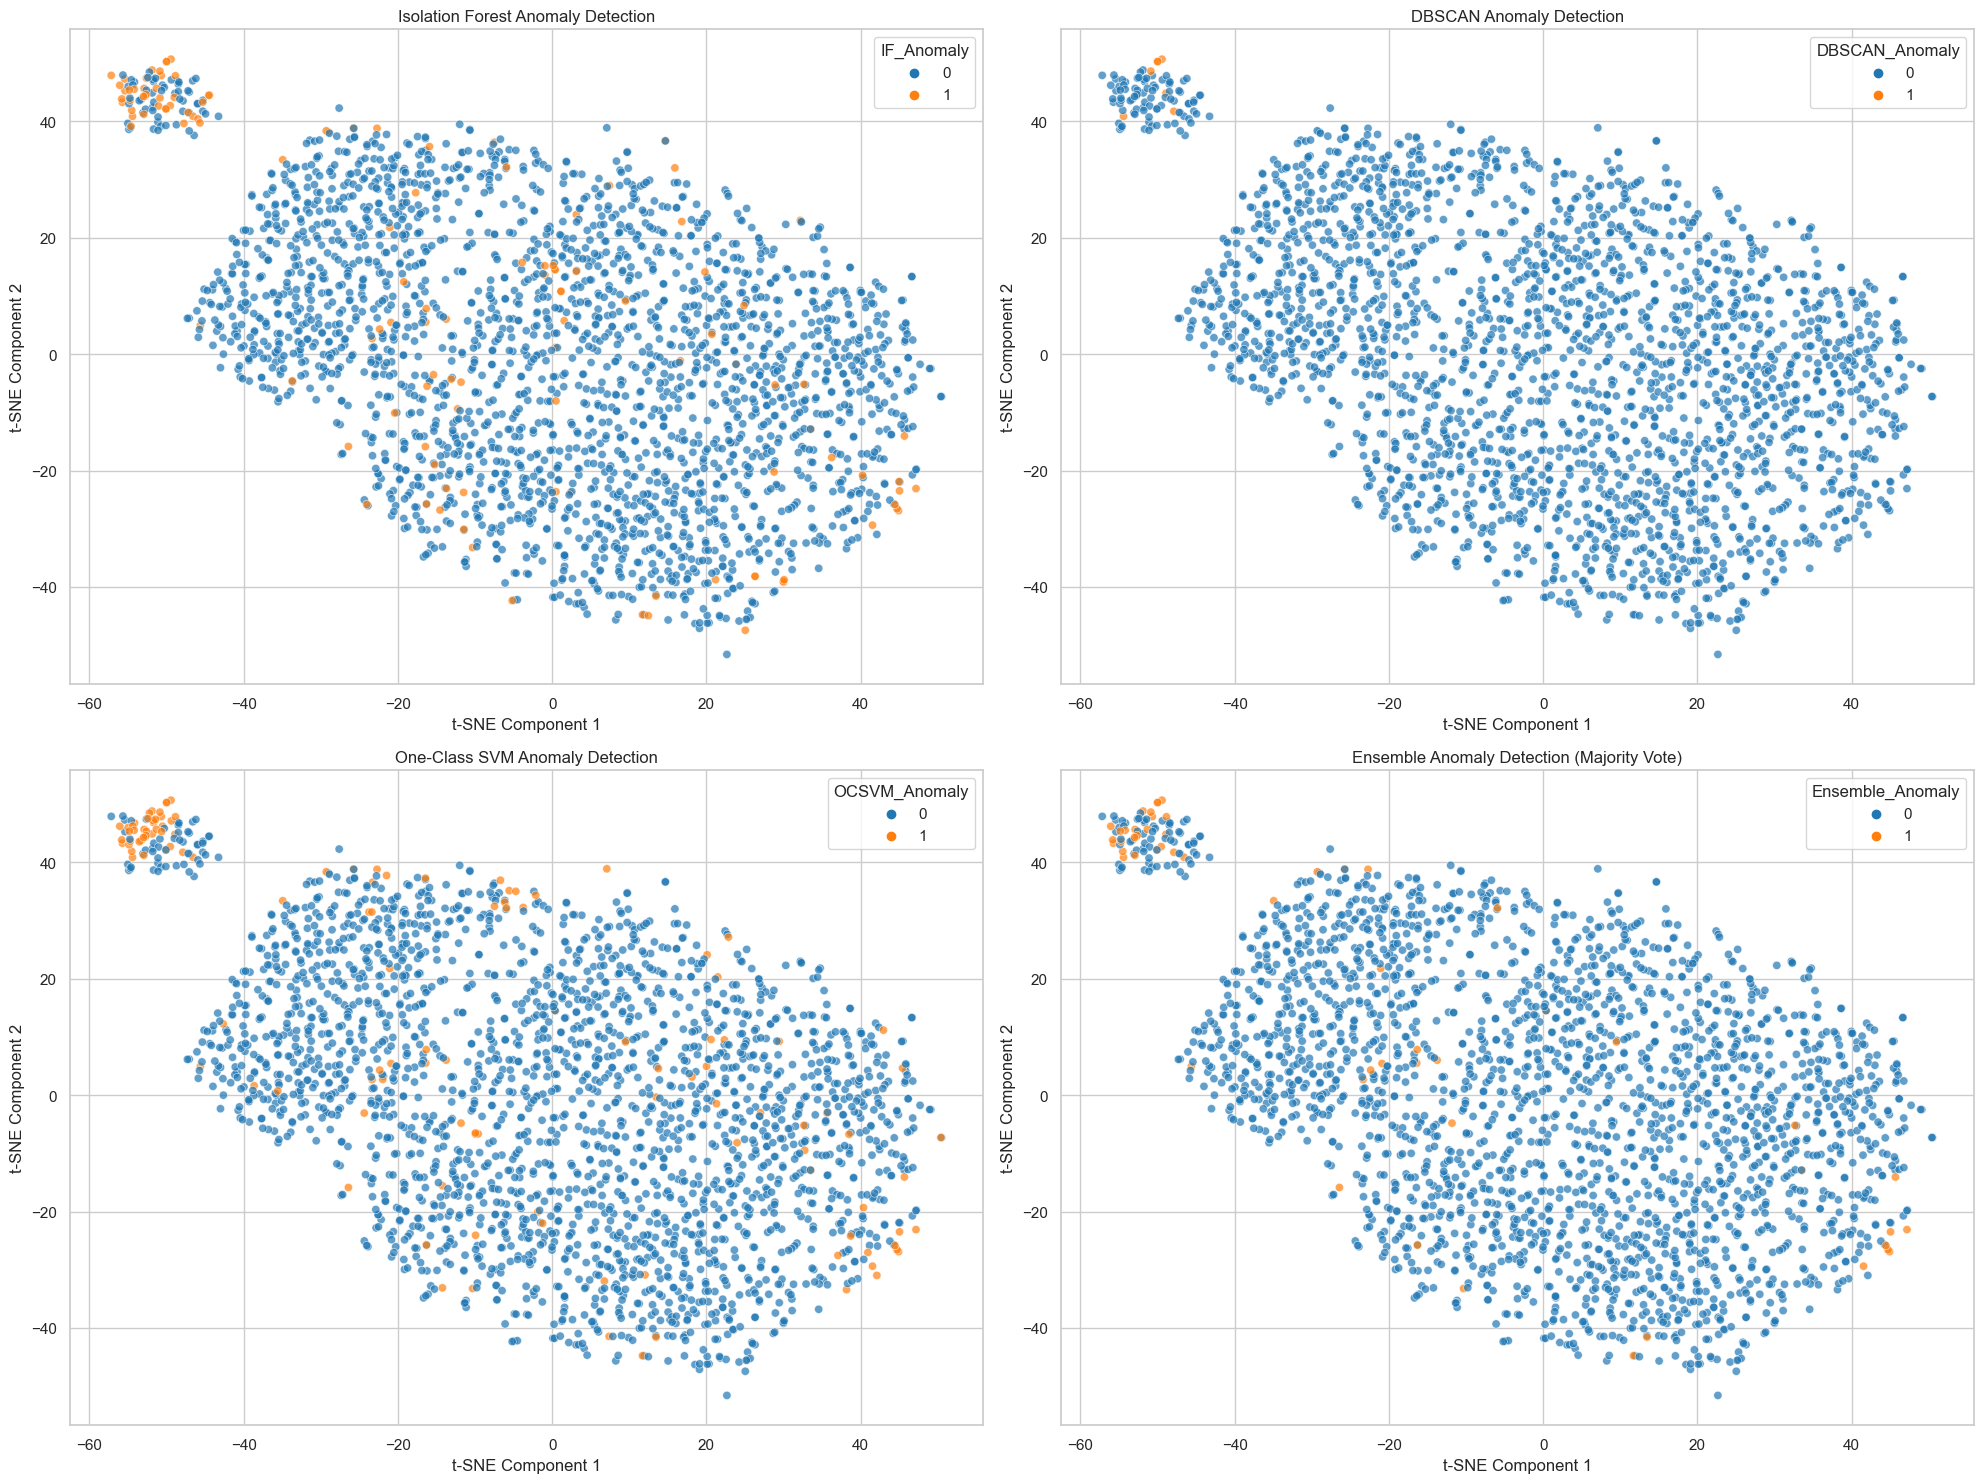

In [135]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=model_data['IF_Anomaly'], palette='tab10', alpha=0.7)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.subplot(2, 2, 2)
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=model_data['DBSCAN_Anomaly'], palette='tab10', alpha=0.7)
plt.title('DBSCAN Anomaly Detection')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.subplot(2, 2, 3)
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=model_data['OCSVM_Anomaly'], palette='tab10', alpha=0.7)
plt.title('One-Class SVM Anomaly Detection')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.subplot(2, 2, 4)
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=model_data['Ensemble_Anomaly'], palette='tab10', alpha=0.7)
plt.title('Ensemble Anomaly Detection (Majority Vote)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

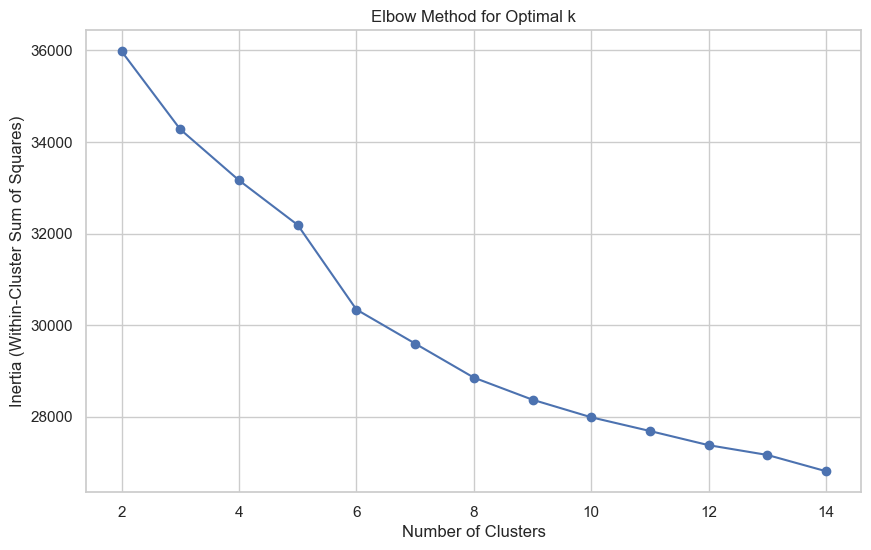

In [136]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

inertia = []
k_range = range(2, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [137]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
model_data['Cluster'] = kmeans.fit_predict(df_scaled)

print(f"\nCluster distribution:")
print(model_data['Cluster'].value_counts())


Cluster distribution:
Cluster
0    788
3    733
2    502
1    489
Name: count, dtype: int64


In [138]:
silhouette_avg = silhouette_score(df_scaled, model_data['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.0594


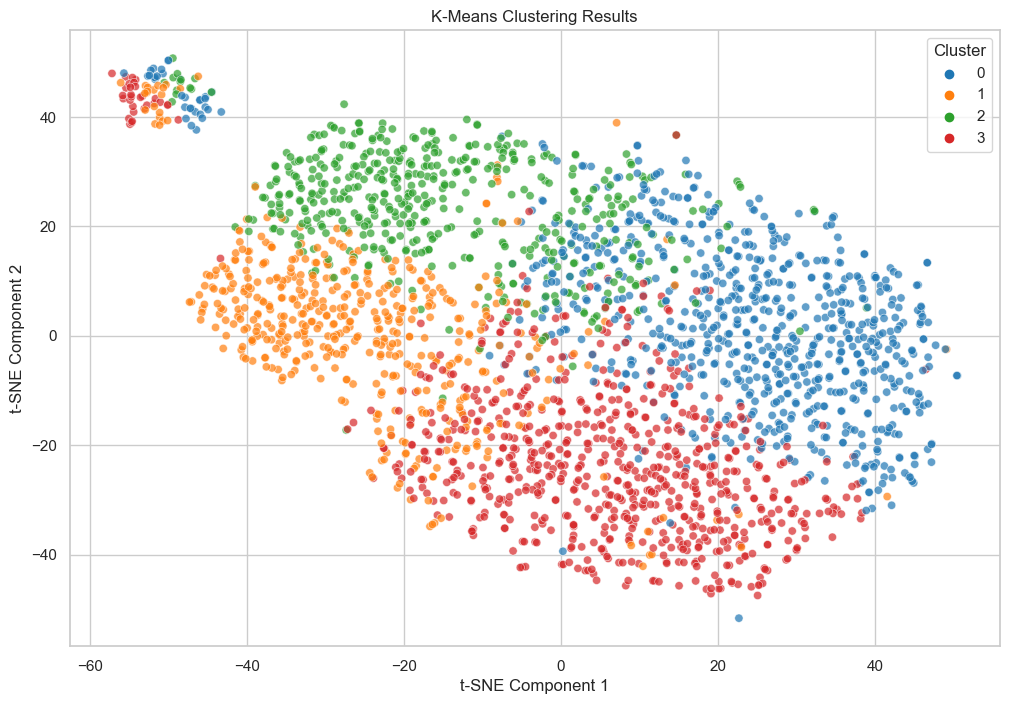

In [139]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], 
                hue=model_data['Cluster'], palette='tab10', alpha=0.7)
plt.title('K-Means Clustering Results')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()